In [131]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import numpy as np

In [12]:
tf.__version__

'1.8.0'

  0%|                                                   | 0/10 [00:00<?, ?it/s]

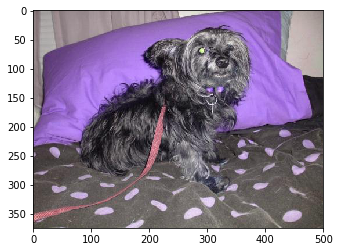

(375, 500, 3)
(50, 50, 3)


 10%|████▎                                      | 1/10 [00:00<00:02,  3.58it/s]

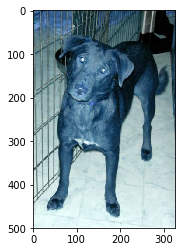

(500, 327, 3)
(50, 50, 3)


 20%|████████▌                                  | 2/10 [00:00<00:01,  4.61it/s]

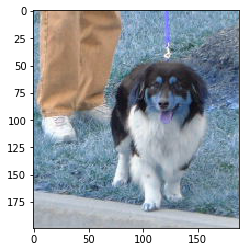

(199, 188, 3)
(50, 50, 3)


 30%|████████████▉                              | 3/10 [00:00<00:01,  4.21it/s]

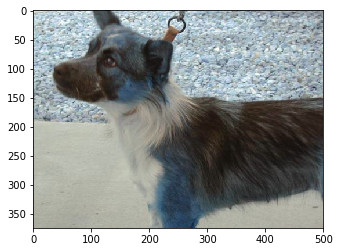

(375, 500, 3)
(50, 50, 3)


 40%|█████████████████▏                         | 4/10 [00:00<00:01,  4.27it/s]

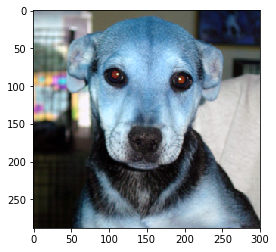

(288, 300, 3)
(50, 50, 3)


 50%|█████████████████████▌                     | 5/10 [00:01<00:01,  4.32it/s]

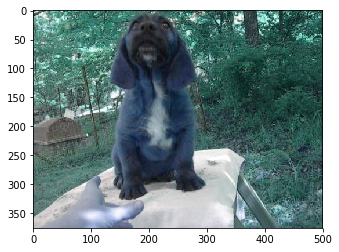

(376, 500, 3)
(50, 50, 3)


 60%|█████████████████████████▊                 | 6/10 [00:01<00:00,  4.31it/s]

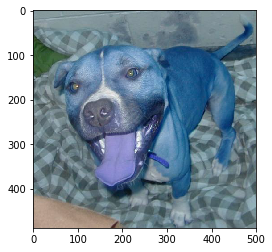

(488, 500, 3)
(50, 50, 3)


 70%|██████████████████████████████             | 7/10 [00:01<00:00,  4.24it/s]

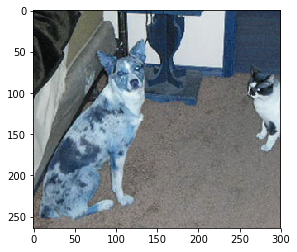

(264, 300, 3)
(50, 50, 3)


 80%|██████████████████████████████████▍        | 8/10 [00:01<00:00,  4.25it/s]

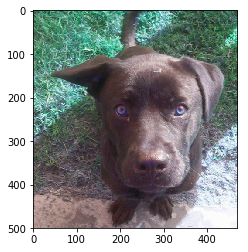

(500, 470, 3)
(50, 50, 3)


 90%|██████████████████████████████████████▋    | 9/10 [00:02<00:00,  4.31it/s]

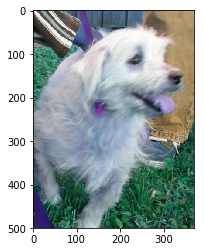

(500, 369, 3)
(50, 50, 3)


  0%|                                                   | 0/10 [00:00<?, ?it/s]

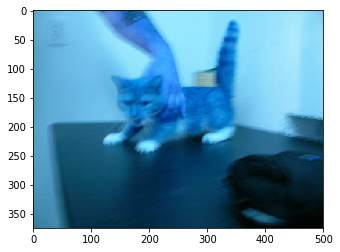

(375, 500, 3)
(50, 50, 3)


 10%|████▎                                      | 1/10 [00:00<00:02,  4.42it/s]

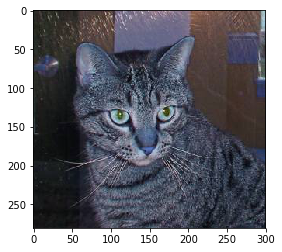

(281, 300, 3)
(50, 50, 3)


 20%|████████▌                                  | 2/10 [00:00<00:01,  4.60it/s]

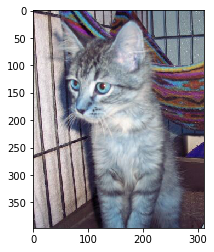

(397, 312, 3)
(50, 50, 3)


 30%|████████████▉                              | 3/10 [00:00<00:01,  4.94it/s]

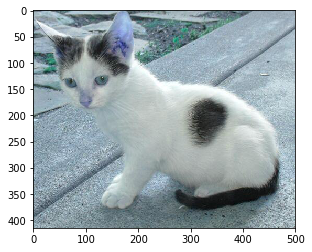

(415, 500, 3)
(50, 50, 3)


 40%|█████████████████▏                         | 4/10 [00:00<00:01,  4.82it/s]

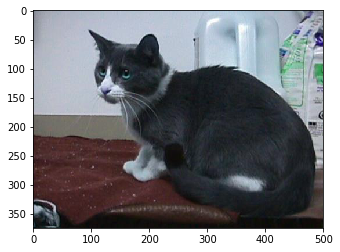

(375, 500, 3)
(50, 50, 3)


 50%|█████████████████████▌                     | 5/10 [00:01<00:01,  4.77it/s]

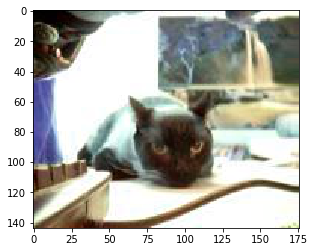

(144, 176, 3)
(50, 50, 3)


 60%|█████████████████████████▊                 | 6/10 [00:01<00:00,  4.85it/s]

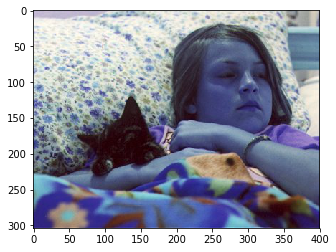

(304, 400, 3)
(50, 50, 3)


 70%|██████████████████████████████             | 7/10 [00:01<00:00,  4.58it/s]

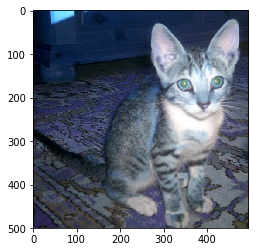

(500, 495, 3)
(50, 50, 3)


 80%|██████████████████████████████████▍        | 8/10 [00:01<00:00,  4.53it/s]

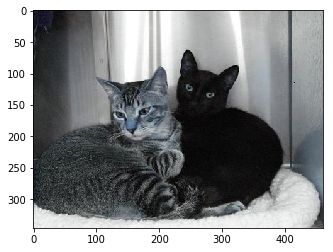

(346, 461, 3)
(50, 50, 3)


 90%|██████████████████████████████████████▋    | 9/10 [00:01<00:00,  4.50it/s]

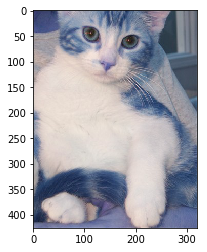

(426, 320, 3)
(50, 50, 3)


100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  4.41it/s]


20


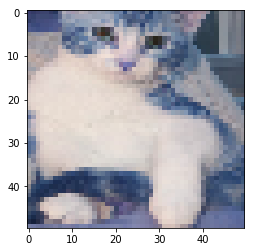

In [34]:
# import cat and dog dataset and classify those images
import logging
path = r'C:\Users\jatoth.kumar\Desktop\imgdata'
categories = ['Dog','Cat']
im_size = 50
training_data_list = []
def training_data():
    for categorie in categories:
        label = categories.index(categorie)
        path1 = os.path.join(path,categorie)
        for x in tqdm(os.listdir(path1)):
            img_arr = cv2.imread(os.path.join(path1,x),1)
            plt.imshow(img_arr)
            plt.show()
            print(img_arr.shape)
            #resizing the image by decreasing the pixels
            new_img = cv2.resize(img_arr,(im_size,im_size))
            plt.imshow(new_img,cmap='gray')
            training_data_list.append([new_img,label])
            print(new_img.shape)
training_data()
logging.info('printing the length')
logging.debug('debugging')
logging.warning('warning')
print(len(training_data_list))


In [88]:
import random
random.shuffle(training_data_list)
[x[1] for x in training_data_list]
x.shape

(60, 50, 50, 1)

In [149]:
x = []
y = []
for feature,label in training_data_list:
    x.append(feature)
    y.append(label)
print(len(x),len(y))
x = np.array(x).reshape(-1,50,50,3)
y = np.array(y)
print(x.shape[1:])
y.shape

20 20
(50, 50, 3)


(20,)

In [150]:
#saving the data so that we can load each time this array
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [151]:
#import the data from the pickle file
pickle_in = open("x.pickle",'rb')
x = pickle.load(pickle_in)

label_in = open('y.pickle','rb')
y = pickle.load(label_in)
x[0].shape,len(y)

((50, 50, 3), 20)

In [152]:
#building a cnn to identify cats and dogs
imagedata = tf.keras.preprocessing.image.ImageDataGenerator
sequential = tf.keras.models.Sequential
dense,dropout,activation,flatten,conv2d,maxpool2d = tf.keras.layers.Dense,tf.keras.layers.Dropout,tf.keras.layers.Activation,tf.keras.layers.Flatten,tf.keras.layers.Conv2D,tf.keras.layers.MaxPooling2D

In [153]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

lables_pickle = open('y.pickle','rb')
y = pickle.load(lables_pickle)

In [154]:
x = x/255.0
x.shape[1:]

(50, 50, 3)

In [162]:
#defining a model of CNN architecture
model = sequential()

model.add(conv2d(128,(3,3),input_shape=(x.shape[1:])))
model.add(activation('relu'))
model.add(maxpool2d((2,2)))

model.add(conv2d(128,(3,3)))
model.add(activation('relu'))
model.add(maxpool2d((2,2)))

model.add(flatten())

model.add(dense(1))
model.add(activation('sigmoid'))


In [163]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [164]:
model.fit(x,y,batch_size=5,epochs=5,validation_split=0.2)

Train on 16 samples, validate on 4 samples
Epoch 1/5
16/16 [==============================] - ETA: 1s - loss: 0.7046 - acc: 0.400 - ETA: 0s - loss: 0.6811 - acc: 0.500 - ETA: 0s - loss: 0.7928 - acc: 0.400 - 1s 68ms/step - loss: 0.7902 - acc: 0.3750 - val_loss: 0.7009 - val_acc: 0.2500
Epoch 2/5
16/16 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.400 - ETA: 0s - loss: 0.6542 - acc: 0.700 - ETA: 0s - loss: 0.6517 - acc: 0.800 - 0s 25ms/step - loss: 0.6587 - acc: 0.7500 - val_loss: 0.7055 - val_acc: 0.5000
Epoch 3/5
16/16 [==============================] - ETA: 0s - loss: 0.6448 - acc: 0.800 - ETA: 0s - loss: 0.6624 - acc: 0.600 - ETA: 0s - loss: 0.6538 - acc: 0.666 - 0s 26ms/step - loss: 0.6439 - acc: 0.6875 - val_loss: 0.7155 - val_acc: 0.5000
Epoch 4/5
16/16 [==============================] - ETA: 0s - loss: 0.5908 - acc: 0.600 - ETA: 0s - loss: 0.5583 - acc: 0.700 - ETA: 0s - loss: 0.6525 - acc: 0.533 - 0s 27ms/step - loss: 0.6746 - acc: 0.5000 - val_loss: 0.7116

In [165]:
# model.predict(x[19])
print(x[0].shape)
pred = model.predict(np.array(x[3]).reshape(-1,50,50,3))
print(pred,np.argmax(pred))
print(y[3])
tensorboard = tf.keras.callbacks.TensorBoard

(50, 50, 3)
[[0.7313651]] 0
1


In [160]:
name = 'new-board1'
tensorboard_new = tensorboard(log_dir='logs/{}'.format(name))
#open tensorboard with command of tensorboard --logdir=logs/ --host=127.0.0.1
model.fit(x,y,batch_size=10,epochs=4,validation_split=0.2,callbacks=[tensorboard_new])

Train on 16 samples, validate on 4 samples
Epoch 1/4
16/16 [==============================] - ETA: 0s - loss: 0.4891 - acc: 0.800 - 0s 20ms/step - loss: 0.4913 - acc: 0.8750 - val_loss: 0.8219 - val_acc: 0.2500
Epoch 2/4
16/16 [==============================] - ETA: 0s - loss: 0.4849 - acc: 0.900 - 0s 23ms/step - loss: 0.4544 - acc: 0.9375 - val_loss: 0.8467 - val_acc: 0.2500
Epoch 3/4
16/16 [==============================] - ETA: 0s - loss: 0.4641 - acc: 0.900 - 0s 21ms/step - loss: 0.4097 - acc: 0.9375 - val_loss: 0.8685 - val_acc: 0.5000
Epoch 4/4
16/16 [==============================] - ETA: 0s - loss: 0.3659 - acc: 1.000 - 0s 23ms/step - loss: 0.4196 - acc: 0.8750 - val_loss: 0.9095 - val_acc: 0.2500
